# Beliefs about Violence Against Women
## Author: Ahria Dominguez
### Last Updated: 7/21/2024

In this project, we will examine date from a Kaggle dataset titled _Violence Against Women and Girls_ (https://www.kaggle.com/datasets/andrewmvd/violence-against-women-and-girls/data). These data include percentages of agreeance with sentiments of violence against women (i.e., how many people agreed with condoning violence against women in different scenarios). We will determine if the gender of the respondent can be predicted using the other features in the dataset and if agreeance percentages could be predicted in specific demographic features. 

The data consist of: 

- Record ID – Each country has its own ID number for each question, so each country has 6 numbers for the whole survey.
- Country – The country the responses were from.
- Gender – The gender of the respondent.
- Demographics Question – The type of demographic to be answered in the following column (e.g., marital status or employment status).
- Demographics Response – The response to the demographic category from the previous column (e.g., never married or unemployed).
- Question – The statement respondents said they agreed or disagreed with. The statements were as follows:
    - A husband is justified in hitting or beating his wife if she burns the food.
    - A husband is justified in hitting or beating his wife if she argues with him.
    - A husband is justified in hitting or beating his wife if she goes out without telling him.
    - A husband is justified in hitting or beating his wife if she neglects the children.
    - A husband is justified in hitting or beating his wife if she refuses to have sex with him.
    - A husband is justified in hitting or beating his wife for at least one specific reason.
- Survey Year – The year the survey was taken.
- Value – The percentage of people who agreed with the statement under “Question.”

##### Import Libraries

In [1]:
# Imports the necessary libraries to transform, visualize, and
# analyze the data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, \
confusion_matrix, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.decomposition import PCA
pd.set_option('display.max_rows', None)

##### Transform the Data

Most of the cleaning has been done in another notebook as to not make this notebook too long. However, I would be happy to provide the code if necessary.

In [2]:
# Loads in the mostly cleaned data into a pandas data frame and prints
# the header.
data = pd.read_csv("new_data.csv")
print(data.head())

   id      country gender        year  15-24  25-34  35-49  higher_educ  \
0   1  Afghanistan      F  01/01/2015   17.3   18.2   18.8         10.1   
1   1  Afghanistan      M  01/01/2015    9.4    8.2    8.6          4.5   
2   1      Albania      F  01/01/2017    0.6    0.8    1.0          0.2   
3   1      Albania      M  01/01/2017    0.9    0.2    0.4          0.8   
4   1       Angola      F  01/01/2015   10.6   10.0   11.0          0.9   

   no_educ  primary_educ  secondary_educ  employed_cash  employed_kind  \
0     19.1          13.8            13.7           20.8           17.0   
1     10.6           6.3             7.1            8.4           10.7   
2      5.8           1.3             0.6            0.6            2.4   
3      0.0           0.8             0.2            0.3            0.5   
4     17.3          13.4             5.3            9.9           14.3   

   unemployed  married_livetogether  never_married  widow_divorce_separate  \
0        18.0             

In [3]:
# There were some instances where the same country was called two different things:
# 'Congo' and 'Congo Democratice Republic,' so I wanted to change them to all be 
# 'Congo' for consistency.
data['country'] = data['country'].replace('Congo Democratic Republic',
                                         'Congo')
# Sorts the data by country in alphabetical order.
data = data.sort_values(by='country')

In [4]:
# Changes the countries' string variables to numeric.
countries = data['country'].unique()
country_num = {country: idx + 1 for idx, country in enumerate(countries)}
data['country_code'] = data['country'].map(country_num)
country_num

{'Afghanistan': 1,
 'Albania': 2,
 'Angola': 3,
 'Armenia': 4,
 'Azerbaijan': 5,
 'Bangladesh': 6,
 'Benin': 7,
 'Bolivia': 8,
 'Burkina Faso': 9,
 'Burundi': 10,
 'Cambodia': 11,
 'Cameroon': 12,
 'Chad': 13,
 'Colombia': 14,
 'Comoros': 15,
 'Congo': 16,
 "Cote d'Ivoire": 17,
 'Dominican Republic': 18,
 'Egypt': 19,
 'Eritrea': 20,
 'Eswatini': 21,
 'Ethiopia': 22,
 'Gabon': 23,
 'Gambia': 24,
 'Ghana': 25,
 'Guatemala': 26,
 'Guinea': 27,
 'Guyana': 28,
 'Haiti': 29,
 'Honduras': 30,
 'India': 31,
 'Indonesia': 32,
 'Jordan': 33,
 'Kenya': 34,
 'Kyrgyz Republic': 35,
 'Lesotho': 36,
 'Liberia': 37,
 'Madagascar': 38,
 'Malawi': 39,
 'Maldives': 40,
 'Mali': 41,
 'Moldova': 42,
 'Morocco': 43,
 'Mozambique': 44,
 'Myanmar': 45,
 'Namibia': 46,
 'Nepal': 47,
 'Nicaragua': 48,
 'Niger': 49,
 'Nigeria': 50,
 'Pakistan': 51,
 'Peru': 52,
 'Philippines': 53,
 'Rwanda': 54,
 'Sao Tome and Principe': 55,
 'Senegal': 56,
 'Sierra Leone': 57,
 'South Africa': 58,
 'Tajikistan': 59,
 'Tanzania

In [5]:
# Changes the gender string variables to numeric.
gender_code = {'F': 1, 'M': 2}
data['gender'] = data['gender'].replace(gender_code)

In [6]:
# Drops the 'country' and 'year' column, as they are not necessary.
data = data.drop(columns=['country', 'year'])

In [7]:
# Assesses the number of rows in the dataset.
data.shape[0]

758

In [8]:
# Assesses the number of each gender in the dataset.
data['gender'].value_counts()

gender
1    415
2    343
Name: count, dtype: int64

In [9]:
# Drops any rows that contain missing data.
data = data.dropna()

In [10]:
# Checks the number of rows after missing data were dropped.
data.shape[0]

628

In [11]:
# Double checks for any missing values.
missing = data.isna().any()
missing

id                        False
gender                    False
15-24                     False
25-34                     False
35-49                     False
higher_educ               False
no_educ                   False
primary_educ              False
secondary_educ            False
employed_cash             False
employed_kind             False
unemployed                False
married_livetogether      False
never_married             False
widow_divorce_separate    False
rural                     False
urban                     False
country_code              False
dtype: bool

In [12]:
# Checks the balance of male and female in the dataset after
# missing values were removed.
data['gender'].value_counts()

gender
1    350
2    278
Name: count, dtype: int64

In [13]:
# Checks which countries were left after removing missing values.
countries = data['country_code'].unique()
countries

array([ 2,  3,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 36, 37, 38, 39, 40,
       41, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 64, 65, 67, 68, 69])

##### Data Exploration

I want to see if there are any visual relationships between variables or differences between groups in the dataset that can be further explored in the models. I will explore the variables through histograms and visually inspect the differences.

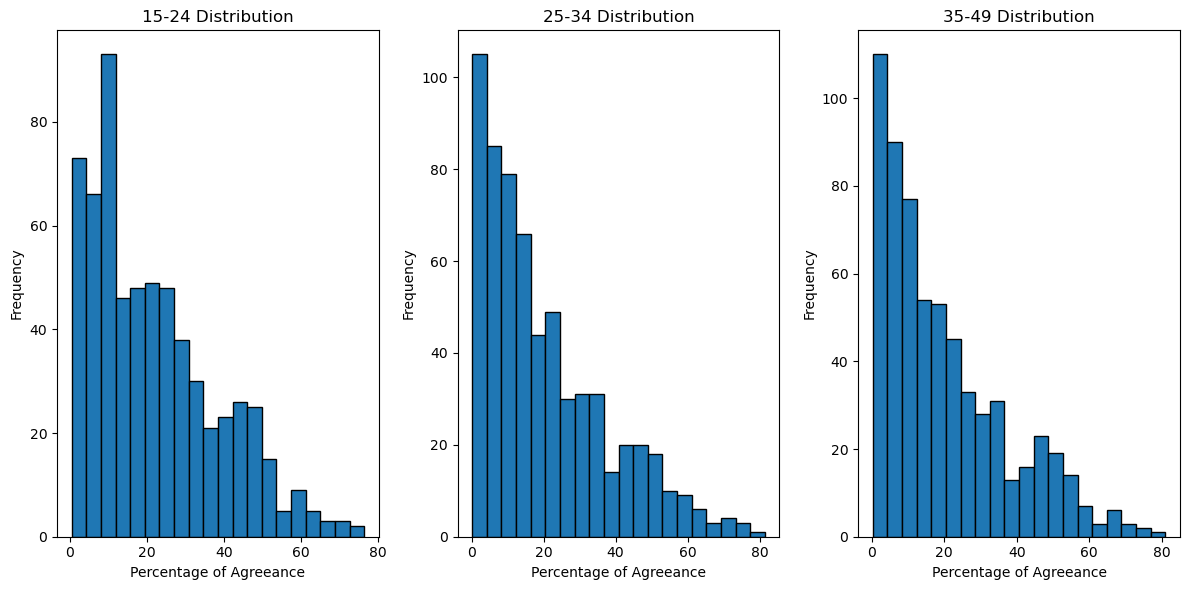

In [14]:
# Plots three histograms to observe the distribution of the age groups. 
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(data['15-24'], bins=20, edgecolor='black')
plt.title('15-24 Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['25-34'], bins=20, edgecolor='black')
plt.title('25-34 Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['35-49'], bins=20, edgecolor='black')
plt.title('35-49 Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

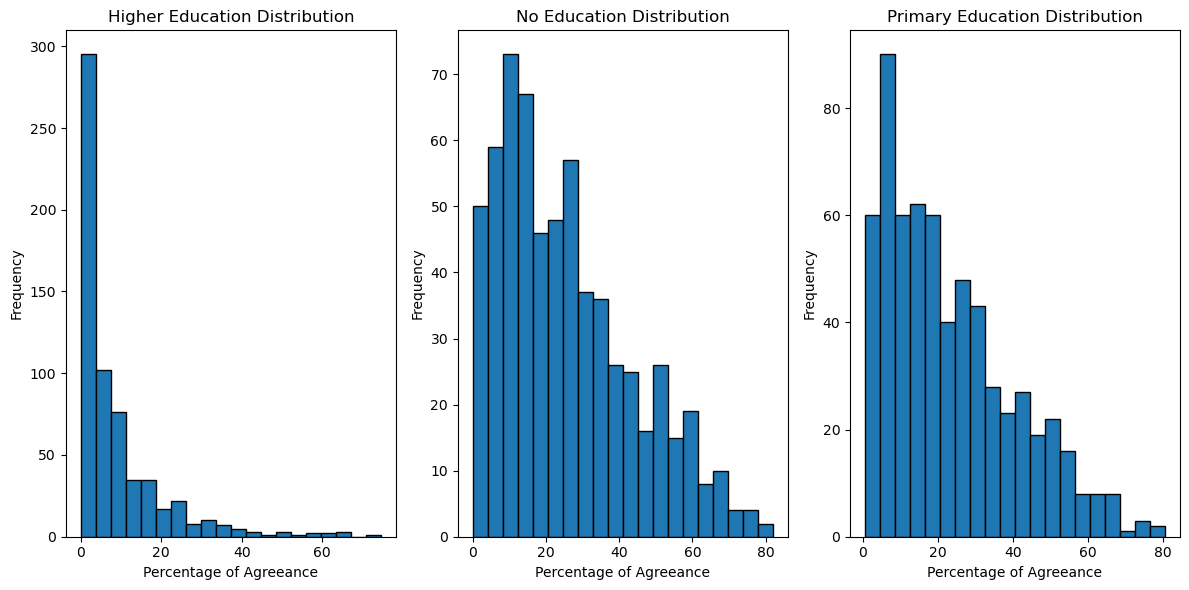

In [15]:
# Plots three histograms to observe the distribution of some education groups. 
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(data['higher_educ'], bins=20, edgecolor='black')
plt.title('Higher Education Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['no_educ'], bins=20, edgecolor='black')
plt.title('No Education Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['primary_educ'], bins=20, edgecolor='black')
plt.title('Primary Education Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

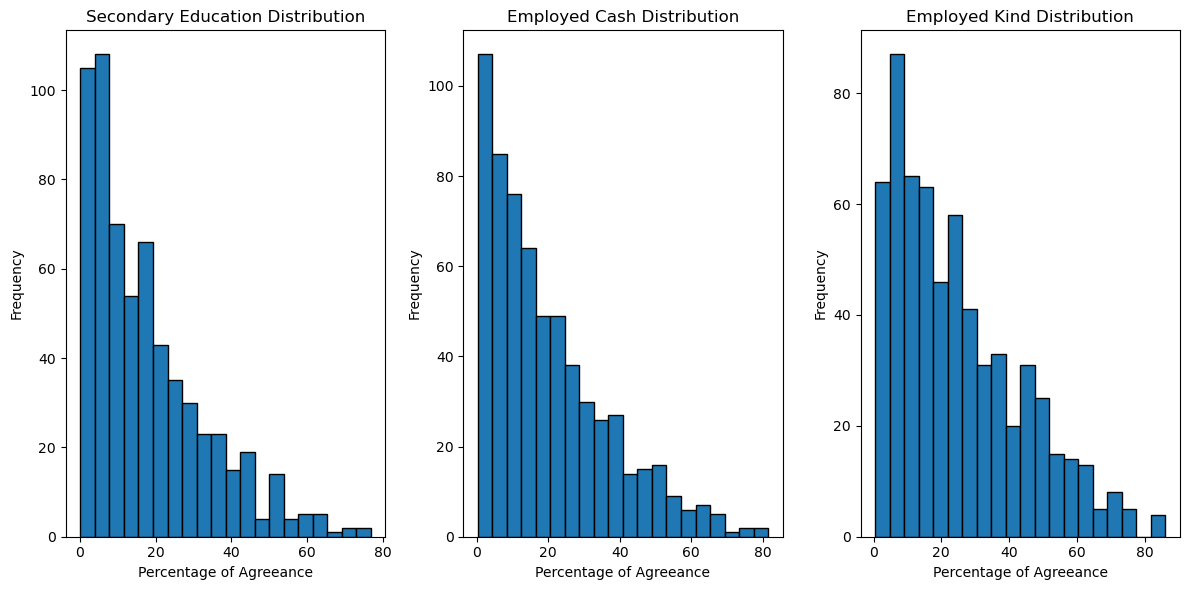

In [16]:
# Plots three histograms to observe the distribution of some education and
# employment status groups. 
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(data['secondary_educ'], bins=20, edgecolor='black')
plt.title('Secondary Education Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['employed_cash'], bins=20, edgecolor='black')
plt.title('Employed Cash Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['employed_kind'], bins=20, edgecolor='black')
plt.title('Employed Kind Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

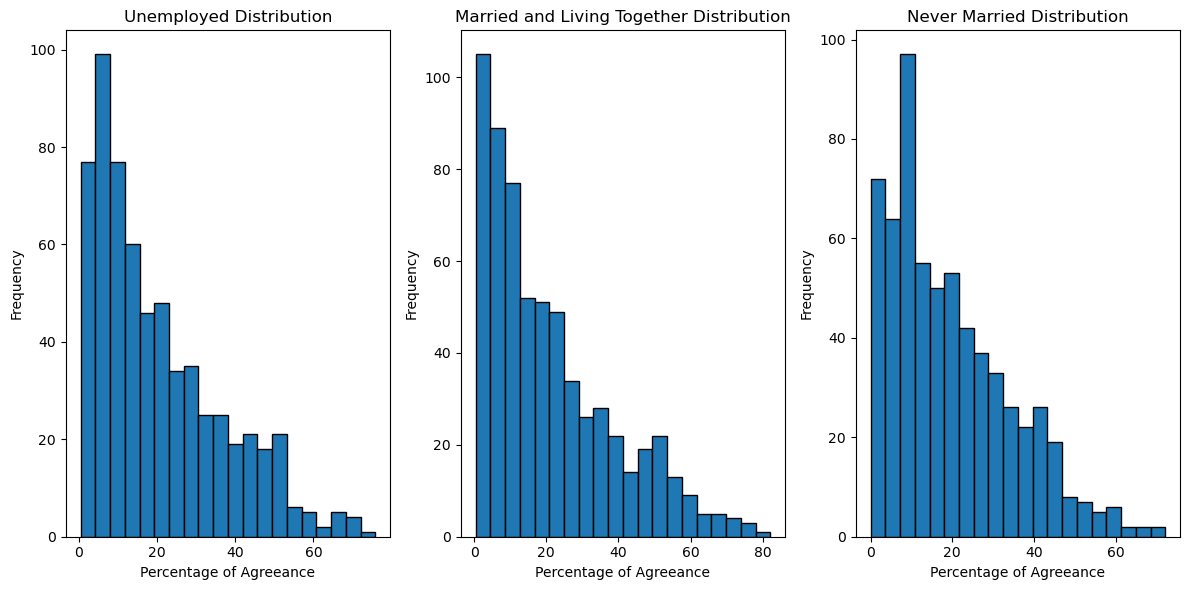

In [17]:
# Plots three histograms to observe the distribution of some employment
# and marital status groups. 
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(data['unemployed'], bins=20, edgecolor='black')
plt.title('Unemployed Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['married_livetogether'], bins=20, edgecolor='black')
plt.title('Married and Living Together Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['never_married'], bins=20, edgecolor='black')
plt.title('Never Married Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

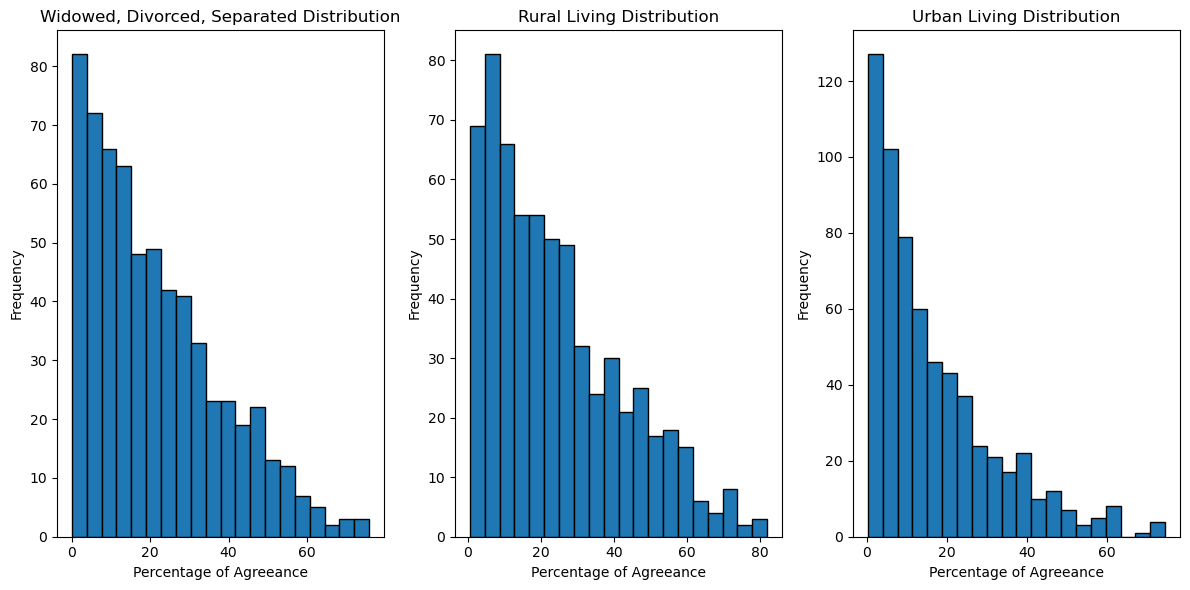

In [18]:
# Plots three histograms to observe the distribution of some marital
# status and living situation groups. 
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(data['widow_divorce_separate'], bins=20, edgecolor='black')
plt.title('Widowed, Divorced, Separated Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(data['rural'], bins=20, edgecolor='black')
plt.title('Rural Living Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(data['urban'], bins=20, edgecolor='black')
plt.title('Urban Living Distribution')
plt.xlabel('Percentage of Agreeance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Classification Models

In [19]:
# Splits the data into features and target variables.
X_class = data.drop(columns=['gender'])
y_class = data['gender']

# Splits the data into training and test sets with a test size of 25%.
X_train_class, X_test_class, y_train_class, \
y_test_class = train_test_split(X_class, y_class, 
                                test_size=0.25, random_state=42)

In [20]:
# Initializes the Logistic Regression model and fits it to the training data.
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_class, y_train_class)
# Finds the predicted values on the test data using the model.
log_preds = logreg.predict(X_test_class)

In [21]:
# Prints the confusion matrix for the logistic regression.
print(confusion_matrix(y_test_class, log_preds))

[[86  9]
 [13 49]]


In [22]:
# Prints the accuracy score for the logistic regression (~86%).
accuracy_score(y_test_class, log_preds)

0.8598726114649682

In [23]:
# Prints the classification report for the logistic regression.
print(classification_report(y_test_class, log_preds))

              precision    recall  f1-score   support

           1       0.87      0.91      0.89        95
           2       0.84      0.79      0.82        62

    accuracy                           0.86       157
   macro avg       0.86      0.85      0.85       157
weighted avg       0.86      0.86      0.86       157



In [24]:
# Initializes the Decision Tree Classifier model and fits it to the training
# data.
dt = DecisionTreeClassifier()
dt.fit(X_train_class, y_train_class)
# Calculates the predicted values using the DTC model.
dt_preds = dt.predict(X_test_class)

In [25]:
# Prints the confusion matrix for the DTC model.
print(confusion_matrix(y_test_class, dt_preds))

[[74 21]
 [20 42]]


In [26]:
# Prints the accuracy score for the DTC model (~71%).
accuracy_score(y_test_class, dt_preds)

0.7388535031847133

In [27]:
# Prints the classification report for the DTC model.
print(classification_report(y_test_class, dt_preds))

              precision    recall  f1-score   support

           1       0.79      0.78      0.78        95
           2       0.67      0.68      0.67        62

    accuracy                           0.74       157
   macro avg       0.73      0.73      0.73       157
weighted avg       0.74      0.74      0.74       157



In [28]:
# Initializes the Support Vector Classifier model and fits it to 
# the training data.
svc = SVC()
svc.fit(X_train_class, y_train_class)
# Calculates the predicted values on the test data using the SVC model.
svc_preds = svc.predict(X_test_class)

In [29]:
# Prints the confusion matrix for the SVC model.
print(confusion_matrix(y_test_class, svc_preds))

[[58 37]
 [10 52]]


In [30]:
# Prints the accuracy score for the SVC model (~70%).
accuracy_score(y_test_class, svc_preds)

0.7006369426751592

In [31]:
# Prints the classification report for the SVC model.
print(classification_report(y_test_class, svc_preds))

              precision    recall  f1-score   support

           1       0.85      0.61      0.71        95
           2       0.58      0.84      0.69        62

    accuracy                           0.70       157
   macro avg       0.72      0.72      0.70       157
weighted avg       0.75      0.70      0.70       157



##### Regression Models

I will perform two different types of regression models on both the higher education and no education variables in the dataset to see which performs the best. The first regression model will be the linear regression.

In [32]:
# Splits the data up into features and target variables.
X_regress = data.drop(columns=['higher_educ'])
y_regress = data['higher_educ']

# Splits the data into training and test sets with a test size of 25%.
X_train_regress, X_test_regress, y_train_regress, \
y_test_regress = train_test_split(X_regress, y_regress, 
                                  test_size=0.25, random_state=42)

In [33]:
# Initializes the linear regression model and fits it to the training data.
linregress = LinearRegression()
linregress.fit(X_train_regress, y_train_regress)
# Calculates the predicted values using the linear regression model.
linregress_preds = linregress.predict(X_test_regress)

In [34]:
# Calculates the R-squared value for the regression.
r2 = linregress.score(X_regress, y_regress)
# Calculates the root mean squared error (RMSE) for the regression.
rmse = np.sqrt(mean_squared_error(y_test_regress, linregress_preds))
# Prints the results.
print("R-Squared:", r2)
print("RMSE:", rmse)

R-Squared: 0.8963970121704171
RMSE: 3.855727719193206


The second linear regression will now be run on the no education variable.

In [35]:
# Splits the data up into features and target variables.
X_regress2 = data.drop(columns=['no_educ'])
y_regress2 = data['no_educ']

# Splits the data up into training and test sets with a test size of 25%.
X_train_regress2, X_test_regress2, y_train_regress2, \
y_test_regress2 = train_test_split(X_regress2, y_regress2,
                                   test_size=0.25, random_state=42)

In [36]:
# Initializes the linear regression and fits it to the training data.
linregress2 = LinearRegression()
linregress2.fit(X_train_regress2, y_train_regress2)
# Calculates the predicted values using the linear regression model.
linregress_preds2 = linregress2.predict(X_test_regress2)

In [37]:
# Calculates the R-squared for the model.
r2_2 = linregress2.score(X_regress2, y_regress2)
# Calculates the RMSE for the model.
rmse2 = np.sqrt(mean_squared_error(y_test_regress2, linregress_preds2))
# Prints the R-squared and RMSE values.
print("R-Squared: ", r2_2)
print("RMSE: ", rmse2)

R-Squared:  0.954921243950408
RMSE:  4.030122676437884


Now, two ordinary least squares (OLS) regression models will be run on the same target variables.

In [38]:
# Splits the data into the features and target variables.
X_ols = data.drop(columns=['higher_educ'])
y_ols = data['higher_educ']

In [39]:
# Initializes and fits the model to the data.
X_ols = sm.add_constant(X_ols)
ols_model = sm.OLS(y_ols, X_ols).fit()
# Calculates the predicted values for the OLS model.
y_ols_preds = ols_model.predict(X_ols)
# Prints the model summary.
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            higher_educ   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     315.1
Date:                Sun, 21 Jul 2024   Prob (F-statistic):          1.26e-288
Time:                        20:05:49   Log-Likelihood:                -1705.6
No. Observations:                 628   AIC:                             3447.
Df Residuals:                     610   BIC:                             3527.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2

In [40]:
# Calculates the RMSE for the OLS model.
np.sqrt(mean_squared_error(y_ols, y_ols_preds))

3.658099185184588

In [41]:
# Splits the data into features and target variables.
X_ols2 = data.drop(columns=['no_educ'])
y_ols2 = data['no_educ']

In [42]:
# Initializes the model and fits it to the data.
X_ols2 = sm.add_constant(X_ols2)
ols_model2 = sm.OLS(y_ols2, X_ols2).fit()
# Calculates the predicted values using the OLS model.
y_ols_preds2 = ols_model2.predict(X_ols2)
# Prints the model summary.
print(ols_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                no_educ   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     770.3
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:05:50   Log-Likelihood:                -1733.0
No. Observations:                 628   AIC:                             3502.
Df Residuals:                     610   BIC:                             3582.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [43]:
# Calculates the RMSE for the OLS model.
np.sqrt(mean_squared_error(y_ols2, y_ols_preds2))

3.8215073826045436

##### Principal Component Analysis

Running a PCA before running the models did not help improve any of the models' metrics. In fact, it actually decreased the models' accuracy scores and R-squared/RMSE scores by quite a bit for most of the models. However, to show that it was attempted, below is an example of a PCA and then a linear regression where the model was not greatly diminished using the PCA data.

In [44]:
# Splits the data into features and target variables.
pca_X_regress = data.drop(columns=['no_educ'])
pca_y_regress = data['no_educ']

In [45]:
# Initializes the scaler and scales the features.
scaler = StandardScaler()
pca_X_scaled = scaler.fit_transform(pca_X_regress)

In [46]:
# Performs a PCA with all components to see explained variance in order
# to determine the optimal number of components.
pca = PCA(n_components=None)
X_pca = pca.fit_transform(pca_X_scaled)
exp_var_ratio = pca.explained_variance_ratio_
cumu_var_ratio = np.cumsum(exp_var_ratio)

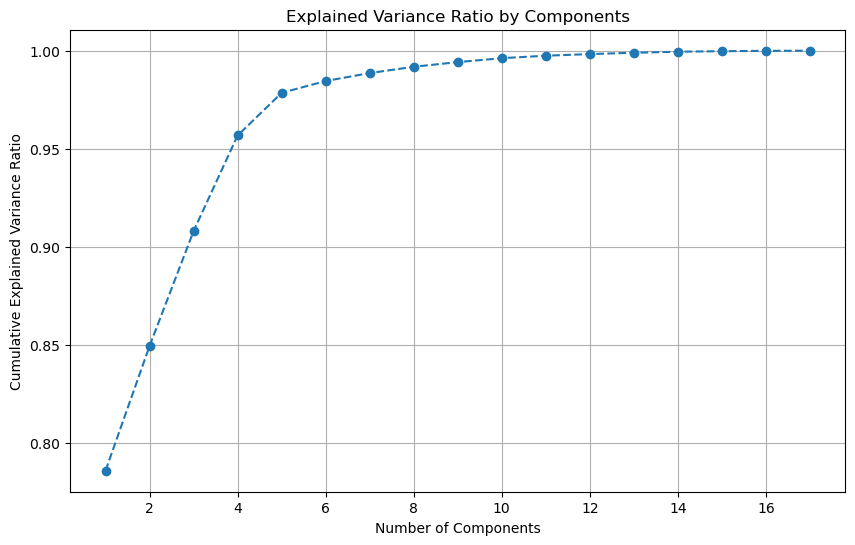

In [47]:
# Plots the PCA's explained variance ratio to see what number captures
# 95% of the variance. Seems to be 4.
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumu_var_ratio) + 1), cumu_var_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio by Components')
plt.grid(True)
plt.show()

In [48]:
# Performs the PCA with the chosen number of components (4).
pca = PCA(n_components=4)
pca_X_transformed = pca.fit_transform(pca_X_scaled)

In [49]:
# Creates a new data frame with the PCA component loadings.
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], 
                            index=pca_X_regress.columns)
print(pca_loadings)

                             PC1       PC2       PC3       PC4
id                      0.096069  0.478017  0.000542  0.871018
gender                 -0.072379  0.791748  0.268580 -0.434424
15-24                   0.269240  0.059388  0.021982 -0.044140
25-34                   0.271488 -0.047062 -0.016346 -0.026753
35-49                   0.268425 -0.100972 -0.050643  0.003389
higher_educ             0.230542  0.135022  0.082250 -0.124686
primary_educ            0.269607 -0.016928 -0.017261 -0.006647
secondary_educ          0.265639  0.072007  0.021624 -0.059748
employed_cash           0.270176 -0.007116 -0.024198 -0.041726
employed_kind           0.262996 -0.073690  0.026377  0.022503
unemployed              0.268675 -0.003049 -0.003968 -0.018030
married_livetogether    0.269948 -0.095405 -0.036042 -0.002098
never_married           0.264587  0.124379  0.038784 -0.065333
widow_divorce_separate  0.264591  0.051528 -0.005328 -0.040314
rural                   0.267528 -0.069943 -0.033786  0

In [50]:
# Splits the data into training and test sets with a test size of 25%.
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X_transformed, 
                                                                    pca_y_regress,
                                                                    test_size=0.25, 
                                                                    random_state=42)

In [51]:
# Initializes the liner regression model and fits it to the training data.
pca_linregress = LinearRegression()
pca_linregress.fit(pca_X_train, pca_y_train)
# Calculates the predicted values using the linear regression model.
pca_preds = pca_linregress.predict(pca_X_test)

In [52]:
# Calculates the R-squared and RMSE scores for the regression.
pca_r2 = pca_linregress.score(pca_X_test, pca_y_test)
pca_rmse = np.sqrt(mean_squared_error(pca_y_test, pca_preds))
print("R-Squared", pca_r2)
print("RMSE:", pca_rmse)

R-Squared 0.8874352785890762
RMSE: 5.882439186223375
